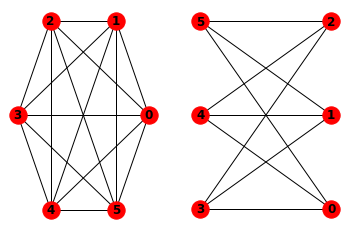

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout

G1 = nx.complete_graph(6) # K6
G2 = nx.Graph() # K3,3
G2.add_nodes_from([0, 1, 2], bipartite=0)
G2.add_nodes_from([3, 4, 5], bipartite=1)
G2.add_edges_from([(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)])

n1 = nx.number_of_nodes(G1)
m1 = nx.number_of_edges(G1)
n2 = nx.number_of_nodes(G2)
m2 = nx.number_of_edges(G2)

plt.subplot(121)
nx.draw_circular(G1, node_size=300, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(122)
bottom_nodes, top_nodes = bipartite.sets(G2)
pos = bipartite_layout(G2, top_nodes)
nx.draw(G2, pos=pos, node_size=300, node_color='red', with_labels=True, font_weight='bold')

## Exercise 3-1


Degree means the number of edges connected to a node. For $G=(V, E), (|V|=n,|E|=m)$, the average degree of graph G is:

$$
AD=\frac{2m}{n}
$$

 



The density D of a network is defined as a ratio of the number of edges m to the number of total possible edges in a network with n nodes, so the formula of average degree is: 

$$
D=\frac{2m}{n(n-1)} = \frac{2 m}{n} \times \frac{1}{n-1} = \frac{AD}{n-1}
$$





## Exercise 3-2

In [13]:
def avg_degree(m,n):
    return int(2*m/n)

def density(m, n):
    return avg_degree(m,n)/(n-1)

n1 = nx.number_of_nodes(G1)
m1 = nx.number_of_edges(G1)
print('K6: #nodes {}, #edges {}, average degree {}, density {}.'.format(n1, m1, avg_degree(m1, n1), density(m1, n1)))

n2 = nx.number_of_nodes(G2)
m2 = nx.number_of_edges(G2)
print('K3,3: #nodes {}, #edges {}, average degree {}, density {}.'.format(n2, m2, avg_degree(m2, n2), density(m2, n2)))

K6: #nodes 6, #edges 15, average degree 5, density 1.0.
K3,3: #nodes 6, #edges 9, average degree 3, density 0.6.


## $L_3$

$L_{r}=\sum_{i=1}^{n}\left[\mathbf{A}^{r}\right]_{i i}=\operatorname{Tr} \mathbf{A}^{r} = \sum_i k_i^r$ ($k_i$ is the eigenvalue of A)


In [30]:
import numpy as np

def get_eigenvalue(A):
    k,_=np.linalg.eig(A)
    return k

def get_lr(A, r):
    return int(np.power(get_eigenvalue(A), 3).sum())

A1 = nx.adjacency_matrix(G1).todense()
A2 = nx.adjacency_matrix(G2).todense()

print(f'L3 of G1(K6): {get_lr(A1, 3)}')
print(f'L3 of G2(K3,3): {get_lr(A2, 3)}')

L3 of G1(K6): 120
L3 of G2(K3,3): 0


In [29]:
x =  get_eigenvalue(A2)
int(np.power(x, 3).sum())

0

## Exercise 3-3 & 3-4

### $K_{3,3}$ 

According to [Euler's formula](https://en.wikipedia.org/wiki/Planar_graph#Euler.27s_formula), if a finite, connected, planar graph is drawn in the plane without any edge intersections, and n is the number of vertices, m is the number of edges and f is the number of faces (regions bounded by edges, including the outer, infinitely large region), then $n-m+f=2$.


It's obvious that $K_{3,3}$ is bipartite, and it doesn't have odd cycles, so it contains no triangles. Therefore, each face of $K_{3,3}$ must be bounded by at least 4 edges, so $f \leq 2 m / 4=m / 2=4.5$(every edge is counted twice).

For $K_{3,3}$, n=6, m=9, cccording to Euler's formula, assuming $K_{3,3}$ is planar, so f should be: f=9+2-6=5, which is contradict with the above, so $K_{3,3}$ is not planar.

### $K_{5}$

Say G= (V, E) be a simple connected planar graph, which has n vertices, $m \geq 3$ edges and r regions. Then we can get $3r \leq 2m$ and $m \leq 3n-6$.

In $K_{5}$, n = 5 and m= 10,and 3n−6 = 9 &lt; m = 10,which is not true, so $K_{5}$ is not planar.



### $K_{6}$
According to [Kuratowski's and Wagner's theorems](https://en.wikipedia.org/wiki/Planar_graph#Kuratowski.27s_and_Wagner.27s_theorems), 
A finite graph is planar if and only if it does not contain a subgraph that is a subdivision of the complete graph $K_5$ or the complete bipartite graph $K_{3,3}$ (utility graph).

And we can easily found that K6 has a subgraph $K_5$, so $K_6$ is not planar.(I drew a simple figure to show that, where the green one is $K_{5}$ and the red one is $K_{5}$).


<img src="k6.jpg" width="40%">

